# Science User Case - Inspecting a Candidate List

Ogle et al. (2016) mined the NASA/IPAC Extragalactic Database (NED) to identify a new type of galaxy: Superluminous Spiral Galaxies. Here's the paper:

Here's the paper: https://ui.adsabs.harvard.edu//#abs/2016ApJ...817..109O/abstract

Table 1 lists the positions of these Super Spirals. Based on those positions, let's create multiwavelength cutouts for each super spiral to see what is unique about this new class of objects.

## 1. Import some Python modules.

In [1]:
#Suppress unimportant warnings.
import warnings
warnings.filterwarnings("ignore")
#Add the workshop directory to your path.
import sys
sys.path.append('workshop-dev-master')

#Import the workshop utilities.
#import navo_utils.utils
#from navo_utils.image import Image, ImageColumn
#from navo_utils.spectra import Spectra, SpectraColumn
#from navo_utils.cone import Cone
#from navo_utils.tap import Tap
#from navo_utils.utils import astropy_table_from_votable_response

#Import the astropy Table module.
from astropy.table import Table

## 2. Search NED for objects in this paper.

Insert a Code Cell below by clicking on the "Insert" Menu and choosing "Insert Cell Below". Then consult QuickReference.md to figure out how to use astroquery to search NED for all objects in a paper, based on the refcode of the paper. Inspect the resulting astropy table.

In [2]:
from astroquery.ned import Ned
objects_in_paper = Ned.query_refcode('2016ApJ...817..109O')
objects_in_paper.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,WISEA J001550.14-100242.3,3.95892,-10.04511,G,52788.0,0.176083,,17.5g,--,10,0,63,7,4,10,0
1,2,WISEA J003807.80-010936.7,9.53252,-1.16024,G,62565.0,0.208695,,18.0g,--,11,0,71,10,5,10,0
2,3,WISEA J040422.92-054134.8,61.09548,-5.69303,G,75138.0,0.250635,,18.6g,--,5,0,61,10,6,8,0
3,4,WISEA J073806.16+282359.6,114.52568,28.39995,G,69255.0,0.23101,,18.0g,--,8,0,66,7,4,10,0
4,5,2MASX J07550424+1353261,118.76776,13.89065,G,66754.0,0.222669,,18.5g,--,7,0,38,6,4,6,0
5,6,WISEA J082655.11+181147.7,126.72969,18.19665,G,79608.0,0.265543,,18.4g,--,4,0,46,6,4,6,0
6,7,2MASX J08542169+0449308,133.59033,4.82511,G,47018.0,0.156835,,16.7g,--,12,0,58,7,4,10,0
7,8,WHL J090944.8+222607,137.4367,22.43539,GClstr,90837.0,0.303,PHOT,,--,5,0,0,4,5,0,0
8,9,2MASX J09094480+2226078,137.4367,22.43538,G,85557.0,0.285386,,19.0g,--,6,0,30,5,6,6,0


## 3. Filter the NED results.

The results from NED will include galaxies, but also other kinds of objects. Print the 'Type' column to see the full range of classifications. Next, print the 'Type' of just the first source in the table, in order to determine its data type (since Python 3 distinguishes between strings and byte strings). Finally, use the data type information to filter the results so that we only keep the galaxies in the list.

In [3]:
objects_in_paper['Type']

G
G
G
G
G
G
G
GClstr
G
G
GClstr


In [4]:
#Let's see whether we are dealing with strings or byte strings
objects_in_paper[0]['Type']

b'G'

In [5]:
#Byte strings it is!
galaxies = objects_in_paper[objects_in_paper['Type'] == b'G']

galaxies.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,WISEA J001550.14-100242.3,3.95892,-10.04511,G,52788.0,0.176083,,17.5g,--,10,0,63,7,4,10,0
1,2,WISEA J003807.80-010936.7,9.53252,-1.16024,G,62565.0,0.208695,,18.0g,--,11,0,71,10,5,10,0
2,3,WISEA J040422.92-054134.8,61.09548,-5.69303,G,75138.0,0.250635,,18.6g,--,5,0,61,10,6,8,0
3,4,WISEA J073806.16+282359.6,114.52568,28.39995,G,69255.0,0.23101,,18.0g,--,8,0,66,7,4,10,0
4,5,2MASX J07550424+1353261,118.76776,13.89065,G,66754.0,0.222669,,18.5g,--,7,0,38,6,4,6,0
5,6,WISEA J082655.11+181147.7,126.72969,18.19665,G,79608.0,0.265543,,18.4g,--,4,0,46,6,4,6,0
6,7,2MASX J08542169+0449308,133.59033,4.82511,G,47018.0,0.156835,,16.7g,--,12,0,58,7,4,10,0
7,9,2MASX J09094480+2226078,137.4367,22.43538,G,85557.0,0.285386,,19.0g,--,6,0,30,5,6,6,0
8,10,2MASX J09260805+2405242,141.53357,24.09004,G,66689.0,0.222451,,17.8g,--,12,0,32,6,7,6,0


## 4. Search the NAVO Registry for image resources.

The paper selected super spirals using WISE, SDSS, and GALEX images. Search the NAVO registry for all image resources, using the 'service_type' search parameter. How many image resources are currently available?

In [6]:
#from navo_utils.registry import Registry

#image_services = Registry.query(service_type='image')

#print(f'{len(image_services)} result(s) found.')

#image_services

## 5. Search the NAVO Registry for image resources that will allow you to search for AllWISE images.

There are hundreds of image resources...too many to quickly read through. Try adding the 'keyword' search parameter to your registry search, and find the image resource you would need to search the AllWISE images.

In [7]:
import pyvo as vo

allwise_image_services = vo.regsearch(servicetype='image', keywords=['allwise'])#, 'NASA/IPAC Infrared Science Archive']) #, waveband='uv')


#allwise_image_services = Registry.query(keyword='allwise', service_type='image')

print(f'{len(allwise_image_services)} result(s) found.')

allwise_image_services.to_table()['ivoid', 'short_name', 'res_title']


1 result(s) found.


ivoid,short_name,res_title
object,object,object
ivo://irsa.ipac/wise/images/allwise/l3a,AllWISE L3a,AllWISE Atlas (L3a) Coadd Images


## 6. Choose the AllWISE image service that you are interested in.

In [8]:
allwise_image_service = allwise_image_services[0]
allwise_image_service

(b'ivo://irsa.ipac/wise/images/allwise/l3a', 1, 1, b'vs:paramhttp', b'std', b'', b'', b'', b'', b'base', b'https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?', b'', 0, b'', b'ivo://irsa.ipac/wise/images/allwise/l3a', 1, b'sia:simpleimageaccess', '', b'ivo://ivoa.net/std/sia', b'ivo://irsa.ipac/wise/images/allwise/l3a', b'vs:catalogservice', b'2015-03-26T02:04:00', b'AllWISE L3a', 'AllWISE Atlas (L3a) Coadd Images', b'2017-03-16T01:00:00', b'research', 'The AllWISE program builds upon the work of the successful Wide-field Infrared Survey Explorer mission (WISE; Wright et al. 2010) by combining data from the WISE cryogenic and NEOWISE (Mainzer et al. 2011 ApJ, 731, 53) post-cryogenic survey phases to form the most comprehensive view of the full mid-infrared sky currently available. By combining the data from two complete sky coverage epochs using an advanced data processing system, AllWISE has generated new products that have enhanced photometric sensitivity and accuracy, and i

## 7. Choose one of the galaxies in the NED list.


In [9]:
from astropy.coordinates import SkyCoord
ra = 3.95892
dec = -10.045109999999999
pos = SkyCoord(ra, dec, unit = 'deg')

## 8. Search for a list of AllWISE images that cover this galaxy.

How many images are returned? Which are you most interested in?

In [10]:
#from navo_utils.image import Image

#Doing an image query will return a list.
#Each element represents the search results for each position.
#If you enter only one position, there will be only one element in the list.
#Each element in the list can contain many images.

#allwise_image_table=Image.query(service=allwise_image_service,coords=pos,radius=0)

In [11]:
allwise_image_table = allwise_image_service.search(pos=pos, size=0)
allwise_image_table

<Table masked=True length=4>
      sia_title        ...    coadd_id  
                       ...              
        object         ...     object   
---------------------- ... -------------
W1 Coadd 0046m107_ac51 ... 0046m107_ac51
W3 Coadd 0046m107_ac51 ... 0046m107_ac51
W4 Coadd 0046m107_ac51 ... 0046m107_ac51
W2 Coadd 0046m107_ac51 ... 0046m107_ac51

## 9. How many images are returned for this one position? Which are you most interested in?

In [12]:
allwise_images = allwise_image_table.to_table()
allwise_images

sia_title,sia_url,sia_naxes,sia_fmt,sia_ra,sia_dec,sia_naxis,sia_crpix,sia_crval,sia_proj,sia_scale,sia_cd,sia_bp_id,sia_bp_ref,sia_bp_hi,sia_bp_lo,magzp,magzpunc,unc_url,cov_url,coadd_id
,,,,deg,deg,,pix,deg,,deg / pix,deg / pix,,,,,,,,,
object,object,int32,object,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,object,object
W1 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W1,3.35e-06,3.78e-06,3.13e-06,20.5,0.006,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-cov-3.fits.gz,0046m107_ac51
W3 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W3,1.156e-05,1.627e-05,7.6e-06,18.0,0.012,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w3-cov-3.fits.gz,0046m107_ac51
W4 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W4,2.209e-05,2.336e-05,1.984e-05,13.0,0.012,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w4-cov-3.fits.gz,0046m107_ac51
W2 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W2,4.6e-06,5.19e-06,4.02e-06,19.5,0.007,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w2-cov-3.fits.gz,0046m107_ac51


## 10. Filter the list of returned AllWISE images so that you are left with only the images taken in band W1 (3.6 micron)

In [13]:
allwise_w1_images = allwise_images[allwise_images['sia_bp_id'] == b'W1']
allwise_w1_images

sia_title,sia_url,sia_naxes,sia_fmt,sia_ra,sia_dec,sia_naxis,sia_crpix,sia_crval,sia_proj,sia_scale,sia_cd,sia_bp_id,sia_bp_ref,sia_bp_hi,sia_bp_lo,magzp,magzpunc,unc_url,cov_url,coadd_id
,,,,deg,deg,,pix,deg,,deg / pix,deg / pix,,,,,,,,,
object,object,int32,object,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,object,object
W1 Coadd 0046m107_ac51,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-int-3.fits,2,image/fits,4.61538,-10.601111,[4095 4095],[2048.0 2048.0],[4.61538 -10.601111],SIN,[-0.0003819444391411 0.0003819444391411],[-0.0003819444391411 -0.0 -0.0 0.0003819444391411],W1,3.35e-06,3.78e-06,3.13e-06,20.5,0.006,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-unc-3.fits.gz,https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/00/0046/0046m107_ac51/0046m107_ac51-w1-cov-3.fits.gz,0046m107_ac51


## 11. Visualize this AllWISE image.

In [14]:
#allwise_w1_image = Image.get_fits(allwise_w1_images[0])
from astropy.io import fits
allwise_w1_image = fits.open(allwise_w1_images['sia_url'][0].decode())

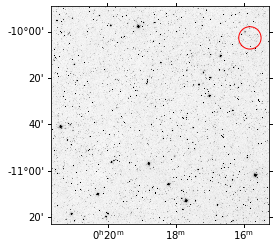

In [15]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
%matplotlib inline  

fig = plt.figure()

wcs = WCS(allwise_w1_image[0].header)
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(allwise_w1_image[0].data, cmap='gray_r', origin='lower', vmax = 10)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

## 12. Plot a cutout of the AllWISE image, centered on your position.

Try a 60 arcsecond cutout.

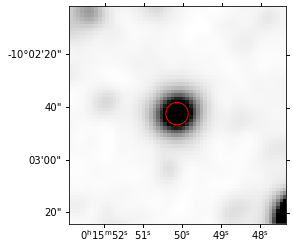

In [16]:
from astropy.nddata import Cutout2D

size = 60
cutout = Cutout2D(allwise_w1_image[0].data, pos, (size, size), wcs=wcs)
wcs = cutout.wcs

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower', vmax = 10)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')


## 13. Try visualizing a cutout of a GALEX image that covers your position.